# Module 13: Time Series Analysis 
## Case Study – 1 
### Domain – SEA Transportation 
### focus –  forecast demand 

In [63]:
# Step 1: Load and Explore the Data

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the data
file_path = 'SeaPlaneTravel.csv'
data = pd.read_csv(file_path)

# Display basic information about the data
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


(None,
      Month  #Passengers
 0  2003-01          112
 1  2003-02          118
 2  2003-03          132
 3  2003-04          129
 4  2003-05          121)

In [64]:
# Preprocess the data

data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Display the first few rows after preprocessing
data.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


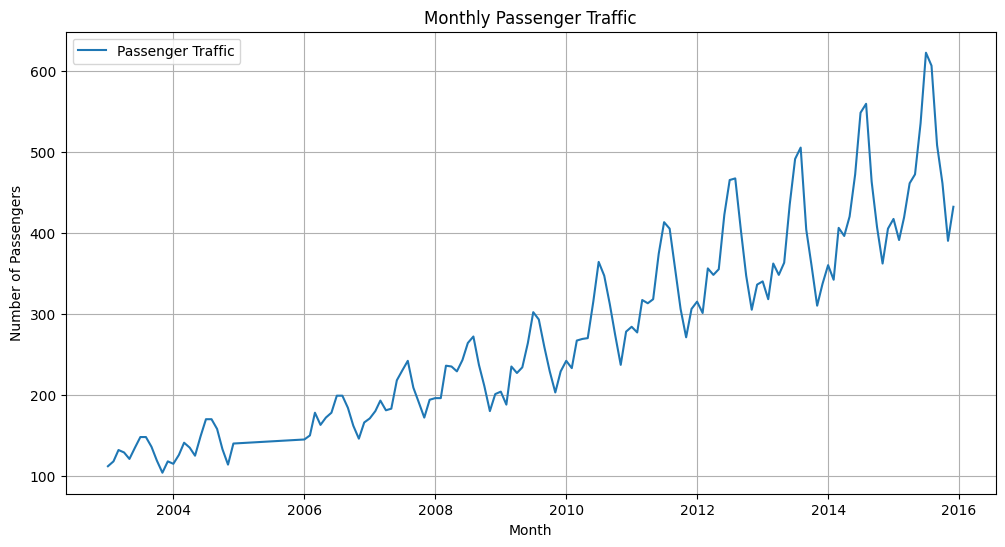

In [65]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Passenger Traffic')
plt.title('Monthly Passenger Traffic')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()


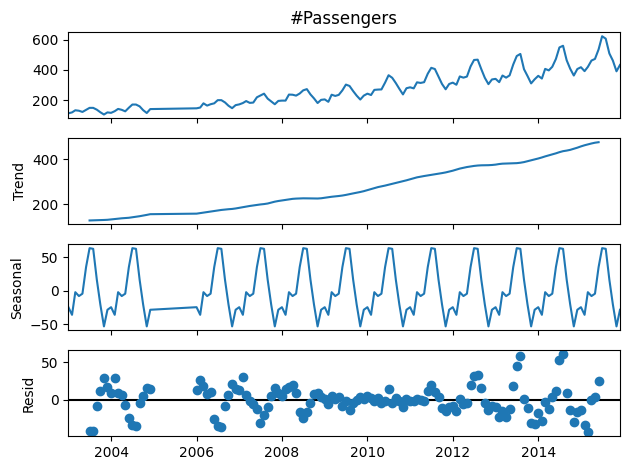

{'Test Statistic': np.float64(0.8153688792060482),
 'p-value': np.float64(0.991880243437641),
 'Lags Used': 13,
 'Observations': 130}

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Decompose the time series
decomposition = seasonal_decompose(data['#Passengers'], model='additive', period=12)
decomposition.plot()
plt.show()

# Perform Dickey-Fuller test for stationarity
adf_test = adfuller(data['#Passengers'])
adf_result = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Observations': adf_test[3]
}
adf_result


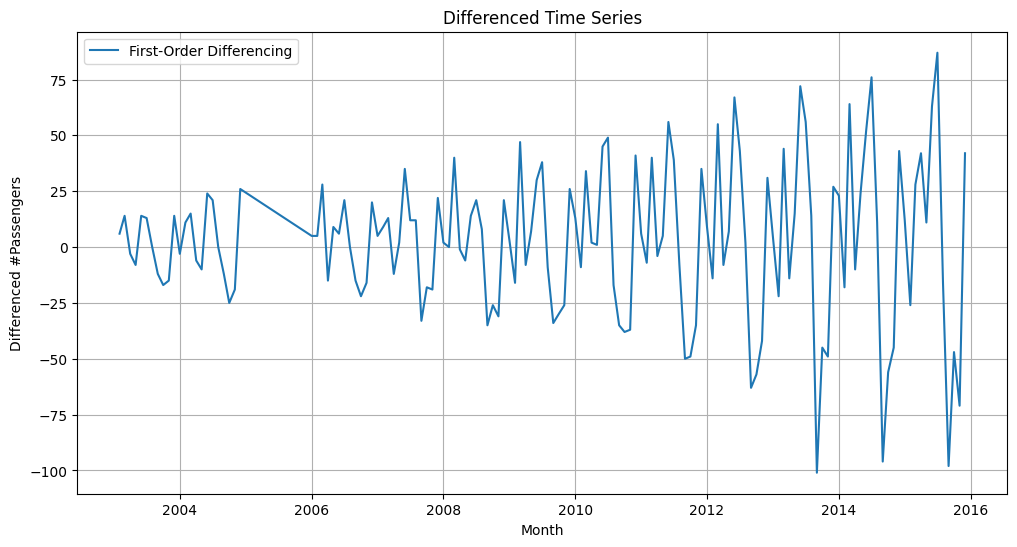

{'Test Statistic': np.float64(-2.8292668241699994),
 'p-value': np.float64(0.0542132902838255),
 'Lags Used': 12,
 'Observations': 130}

In [67]:
# Apply first-order differencing
data_diff = data['#Passengers'].diff().dropna()

# Perform Dickey-Fuller test on differenced data
adf_test_diff = adfuller(data_diff)
adf_diff_result = {
    'Test Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Lags Used': adf_test_diff[2],
    'Observations': adf_test_diff[3]
}

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label='First-Order Differencing')
plt.title('Differenced Time Series')
plt.xlabel('Month')
plt.ylabel('Differenced #Passengers')
plt.legend()
plt.grid()
plt.show()

adf_diff_result


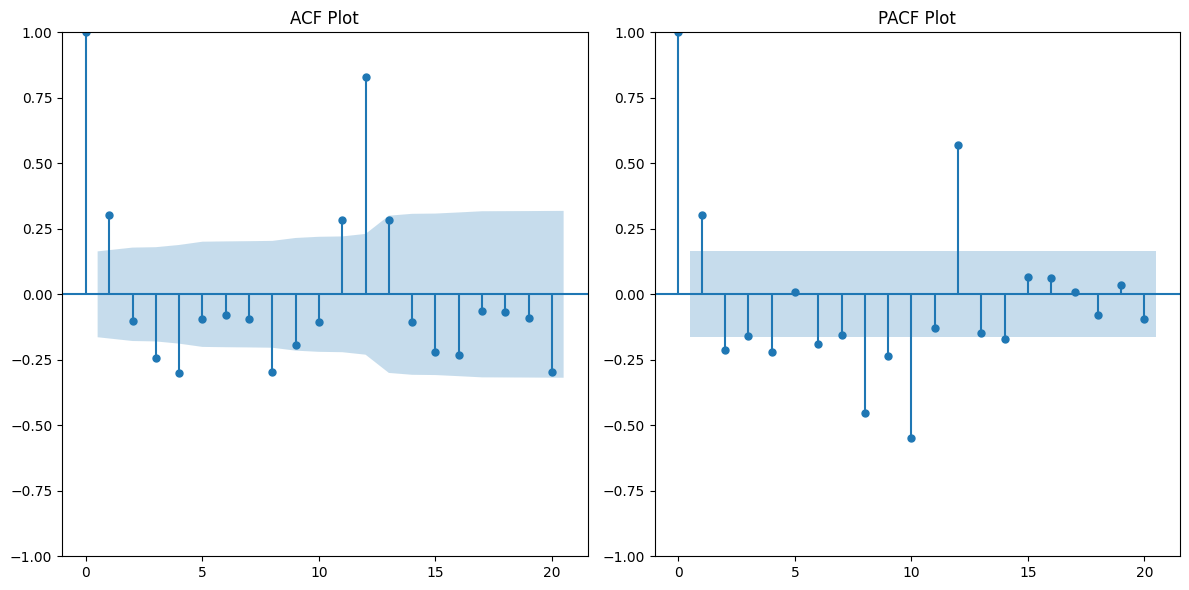

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_diff, ax=plt.gca(), lags=20)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(data_diff, ax=plt.gca(), lags=20, method='ywm')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()



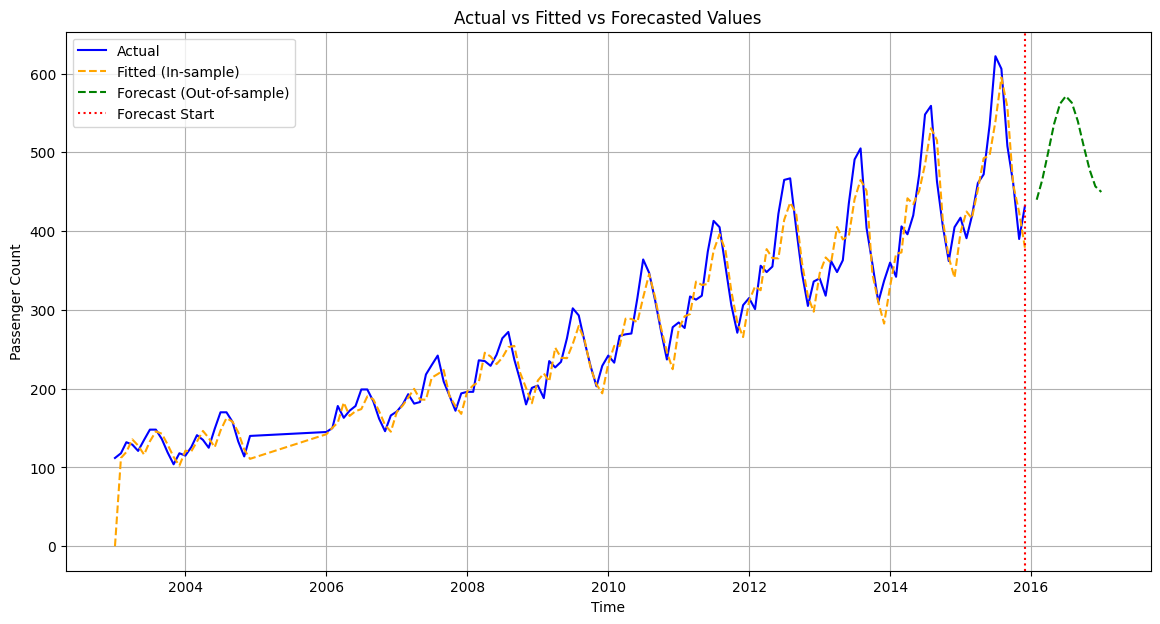

            Actual      Fitted
Month                         
2014-10-01     407  414.604200
2014-11-01     362  366.759404
2014-12-01     405  340.884742
2015-01-01     417  398.194963
2015-02-01     391  424.817738
2015-03-01     419  416.247328
2015-04-01     461  452.660009
2015-05-01     472  492.453091
2015-06-01     535  496.153805
2015-07-01     622  539.260368
2015-08-01     606  594.968079
2015-09-01     508  557.268304
2015-10-01     461  459.378053
2015-11-01     390  423.852501
2015-12-01     432  378.932323


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:            #Passengers   No. Observations:                  144
 Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
 Date:                Wed, 01 Jan 2025   AIC                           1353.347
 Time:                        18:32:20   BIC                           1368.161
 Sample:                             0   HQIC                          1359.366
                                 - 144                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
 ar.L2         -0.9548      0.017    -55.419      0.000      -0.989   

In [69]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['#Passengers'], order=(2, 1, 2))
model_fit = model.fit()

# Display model summary
model_summary = model_fit.summary()

# Get fitted values (in-sample predictions) for the observed data
fitted_values = model_fit.fittedvalues

# Forecast future values
forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months



# Combine actual values, fitted values, and forecasted values
comparison = pd.DataFrame({
    'Actual': data['#Passengers'],
    'Fitted': fitted_values
})

# Visualize Actual, Fitted, and Forecasted values
plt.figure(figsize=(14, 7))
plt.plot(comparison['Actual'], label='Actual', color='blue')
plt.plot(comparison['Fitted'], label='Fitted (In-sample)', color='orange', linestyle='--')
plt.plot(forecast_series, label='Forecast (Out-of-sample)', color='green', linestyle='--')
plt.axvline(data.index[-1], color='red', linestyle=':', label='Forecast Start')
plt.title('Actual vs Fitted vs Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid()
plt.show()

# Display side-by-side comparison table for recent values
recent_comparison = comparison.tail(15)
print(recent_comparison)

# Return model summary and forecast for review
model_summary, forecast_series

